# Overview 

Dataset of Forbes billionaire list 2021. 

- Name
- NetWorth
- Country
- Source
- Rank
- Age
- Residence
- Citizenship
- Status
- Children
- Education
- Self_made
- geometry

# Motivation

Using the dataset to explore the following:

- What country has the most billionares
- Name/Source of income for billionaires 
- Networth of top billionares 
- Percentage of self-made billionare
- Education /School of billionaries 
- Average age of billionaires 
- Education / billionare correlation 

# Dataset source 

Dataset is from Kaggle: https://www.kaggle.com/alexanderbader/forbes-billionaires-2021-30 

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

# Initial Inspection of Data

In [2]:
#Read in data 
df = pd.read_csv('forbes_billionaires_geo.csv')
df.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",True,POINT (-95.9383758 41.2587459)
6,Larry Ellison,93.0,United States,software,7,76.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",True,POINT (-156.9029493 20.8305441)
7,Larry Page,91.5,United States,Google,8,48.0,"Palo Alto, California",United States,Married,1.0,"Master of Science, Stanford University; Bachel...",True,POINT (-122.1598465 37.4443293)
8,Sergey Brin,89.0,United States,Google,9,47.0,"Los Altos, California",United States,Married,3.0,"Master of Science, Stanford University; Bachel...",True,POINT (-122.116578 37.3790629)
9,Mukesh Ambani,84.5,India,diversified,10,64.0,"Mumbai, India",India,Married,3.0,"Drop Out, Stanford University; Bachelor of Sci...",False,POINT (72.8773928 19.0759899)


In [3]:
df.shape

(2755, 13)

In [4]:
df.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Residence',
       'Citizenship', 'Status', 'Children', 'Education', 'Self_made',
       'geometry'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
 12  geometry     2755 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 279.9+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
geometry          0
dtype: int64

__Conclusion from initial inspection__

- Column data types are ok 
- Chidlren, geometry column can be removed 
- Missing values can be replaced with mean: Age column
- Missing values for Status: Change to Unknown
- Clean Education columns to just university name attended 

-----

# Cleaning Process 

In [11]:
# Drop Children column 
df_new = df.drop(['Children','geometry'], axis = 1)

In [12]:
df_new.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,"Drop Out, Harvard University",True


In [26]:
# Clean University Column to just the University not level of education for simplicity. 
df_new['Education'] = df_new['Education'].str.replace('Bachelor of Arts', '').str.replace('Science', '').str.replace('Drop Out', '').str.replace('Master of', '')

In [30]:
df_new.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,Princeton University,True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,University of Pennsylvania,True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,Ecole Polytechnique de Paris,False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,Harvard University,True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,Harvard University,True


In [29]:
# Replace mean as Age column for missing values to prevent dropping the columns with NaN values 
df_new['Age'].mean()

63.267300380228136

In [31]:
df_new['Age'] = df_new['Age'].replace(np.nan, 63)

In [35]:
# Let's replace all missing values with Unknown as it is a small amount and can prove to be helpful in the analysis
df_new.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age               0
Residence        40
Citizenship      16
Status          665
Education      1346
Self_made        18
dtype: int64

In [43]:
# Lets change the Status to Unknown instead of removing the data 
df_new['Status'] = df_new['Status'].replace(np.nan, 'Unknown')
df_new['Residence'] = df_new['Residence'].replace(np.nan, 'Unknown')
df_new['Self_made'] = df_new['Self_made'].replace(np.nan, 'Unknown')
df_new['Education'] = df_new['Education'].replace(np.nan, 'Unknown')
df_new['Citizenship'] = df_new['Citizenship'].replace(np.nan, 'Unknown')

In [44]:
df_new.isnull().sum()

Name           0
NetWorth       0
Country        0
Source         0
Rank           0
Age            0
Residence      0
Citizenship    0
Status         0
Education      0
Self_made      0
dtype: int64

-----

# EDA Process of Billionaires 

- What country has the most billionares
- Name/Source of income for billionaires
- Networth of top billionares
- Percentage of self-made billionare
- Education /School of billionaries
- Average age of billionaires
- Education / billionare correlation


In [46]:
df_new.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,Princeton University,True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,University of Pennsylvania,True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,Ecole Polytechnique de Paris,False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,Harvard University,True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,Harvard University,True


In [47]:
#What country has the most billionaires?
df['Country'].value_counts()

United States    724
China            626
India            140
Germany          136
Russia           118
                ... 
Liechtenstein      1
Tanzania           1
Guernsey           1
Nepal              1
Macao              1
Name: Country, Length: 70, dtype: int64

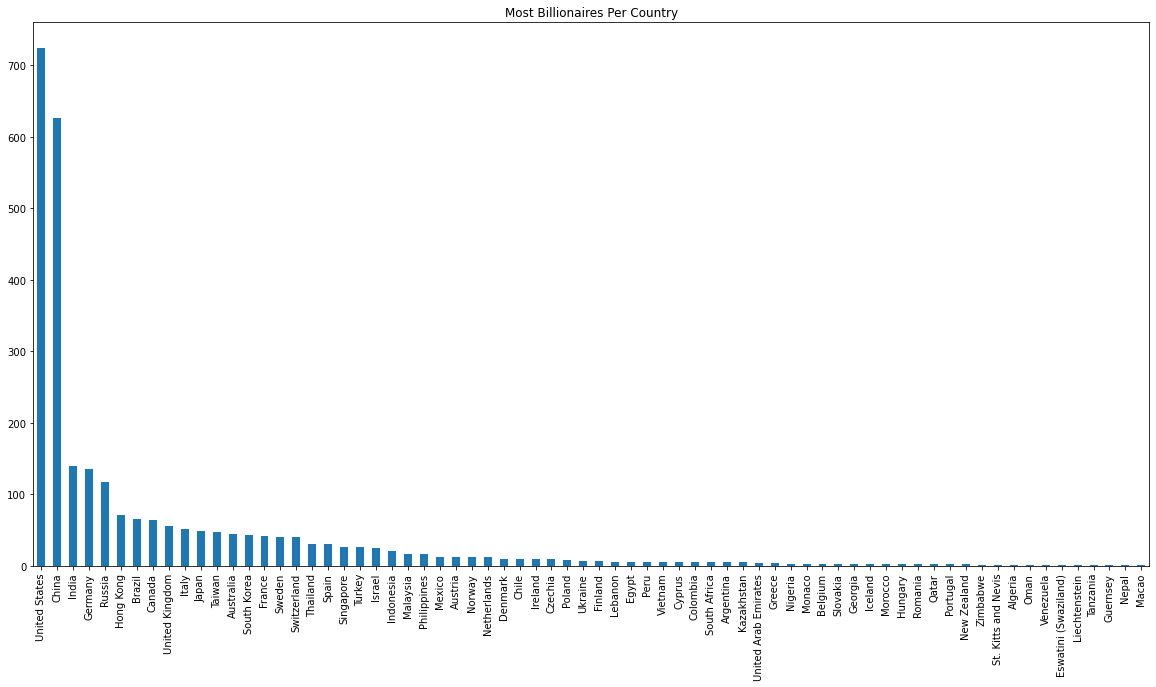

In [49]:
# Visualize this data for better understanding
import matplotlib.pyplot as plt
%matplotlib inline

df_new['Country'].value_counts().plot.bar(figsize = (20,10))
plt.title("Most Billionaires Per Country");

In [52]:
# Let's explore the first 20 top countries
import plotly.express as px
country_percent = df_new["Country"].value_counts()[:20]
country_percent = pd.DataFrame(country_percent)
country_percent = country_percent.reset_index()
fig =px.sunburst(country_percent,  path=['index'],values='Country',color_continuous_scale='rainbow'
                ,color='Country')
fig.show()

__Conclusion From Data__

- USA has the highest number of billionaires: 724
- China second: 626
- India third: 140


If we could incorporate the population of each country we could get a deeper analysis as to the likely hood of what country is most successful for billionaire status.  China and India are ranking as the top populated countries in the world yet America has more billionaires. Even if you combine China and India you get 766 billionaires total but America has 724. 


We could also look at first world status compared to third world status. China and India are third world countries but outrank even some first world countries like South Korea, Japan, Canada, Germany etc.  

----

# What is the total number of self made billionaires compared to non self made?

In [57]:
print(df_new['Self_made'].value_counts())


True       1960
False       777
Unknown      18
Name: Self_made, dtype: int64

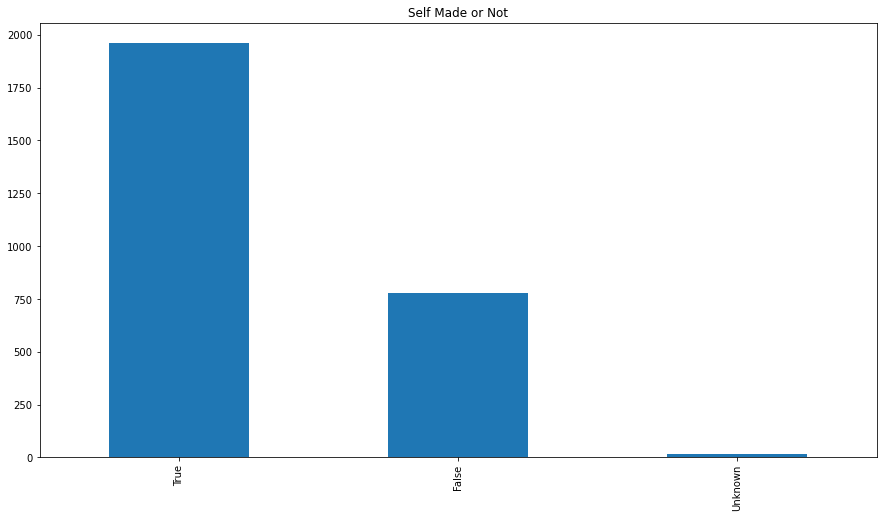

In [60]:
df_new['Self_made'].value_counts().plot.bar(figsize = (15,8))
plt.title("Self Made or Not");

__Conclusion From Data__

- A lot more self made billionaires than expected. Self made billionaires are almost double the amount of non self made billionaires. 

---

# Let's combine self made and country together for top 20 

United States     724
China             626
India             140
Germany           136
Russia            118
Hong Kong          71
Brazil             65
Canada             64
United Kingdom     56
Italy              51
Japan              49
Taiwan             47
Australia          44
South Korea        43
France             42
Sweden             41
Switzerland        40
Thailand           31
Spain              30
Singapore          27
Name: Country, dtype: int64


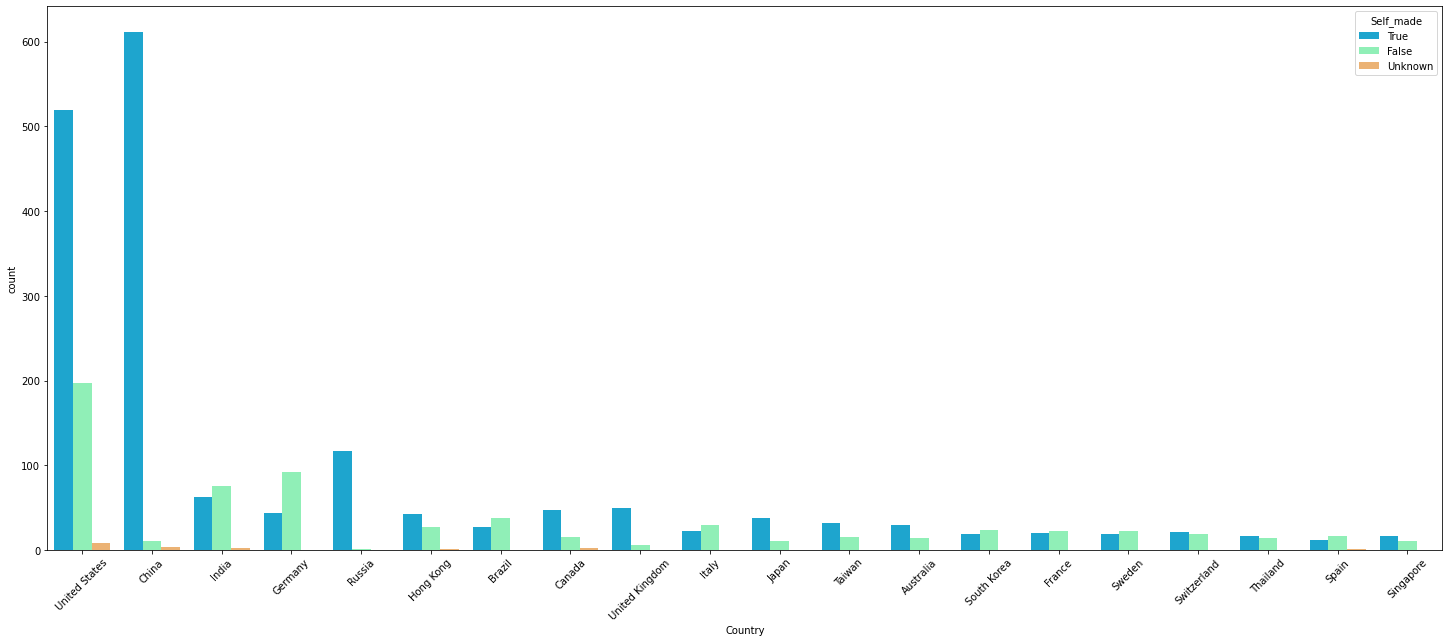

In [72]:
print(df_new["Country"].value_counts().head(20))
plt.figure(figsize=(25,10))
sns.countplot(x="Country",data= df_new,hue= "Self_made",order = df_new['Country'].value_counts().index[:20],palette="rainbow")
plt.xticks(rotation=45)
plt.show()

__Conclusion From Data__

- India, Germany, Brazil, Italy, South Korea, France, Sweden and Spain all come from __non__ self made billionaires. Corporations and families helped them reach billionaire status.  

- China has the highest self made billionaires and very little come from __non__ self made ways around 10+-. 


TypeError: 'AxesSubplot' object is not subscriptable

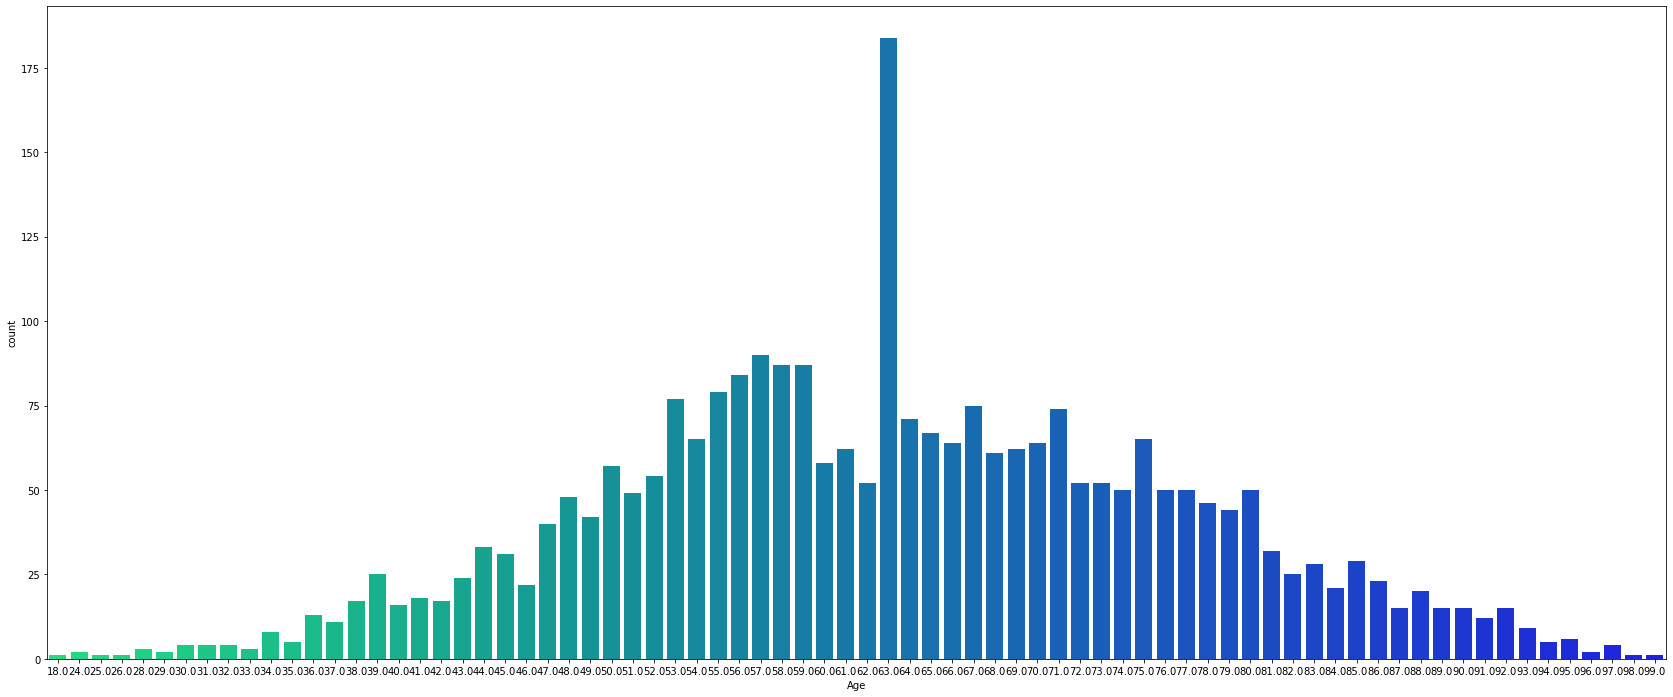

In [80]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(29,12))
sns.countplot(df_new.Age,palette="winter_r")[:20]
plt.show();